In [104]:
import cnn_limits.notebook
import imp
imp.reload(cnn_limits.notebook)

from cnn_limits.notebook import ExperimentResults, el, plot_df

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [347]:
el["myrtle10_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_lik_vs_acc/27", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
""")
el["myrtle10_zca_v2"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_lik_vs_acc/27", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020.
Using ZCA and per-instance mean-subtraction and unit-normalization.
""")
el["myrtle10_nozca"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_lik_vs_acc/1", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using mean-subtraction.
""")
el["myrtle10_gaussian_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_lik_vs_acc/29", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
""")
el["myrtle10_gaussian_zca_v2"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/2", """
Myrtle10-Exp for small data, like in Shankar et al. 2020. Using ZCA (tested to be like them) and mean-subtraction.
""")
el["myrtle10_gaussian_zca_v3"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/3", """
Myrtle10-Exp for small data, like in Shankar et al. 2020. Using ZCA (tested to be like them) and mean-subtraction.
What if regression targets are {-1, 1} ?
""")
el["myrtle10_gaussian_zca_v4"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/4", """
Myrtle10-Exp for small data, like in Shankar et al. 2020. Using ZCA (tested to be like them) and mean-subtraction.
What if regression targets are {0, 1} ?
""")

el["myrtle5_gaussian_zca_shankar_v2"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/17", """
Myrtle5, using *correlation* matrix, Shankar's CheatZCA data set.
""")

el["myrtle5_gaussian_zca_shankar_cov"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/16", """
Myrtle5, using *covariance* matrix, using Shankar's CheatZCA data set.
""")

el["myrtle5_zca_corr"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/5", """
Use ZCA *after* cutting the data set. Use last 10k training examples as test. Correlation matrix.
""")
el["myrtle5_zca_cov"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/6", """
Use ZCA *after* cutting the data set. Use last 10k training examples as test.
""")
    
el["myrtle5_corr"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/7", """
No ZCA. Last 10k train as test. Correlation.""")
el["myrtle5_cov"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/8", """
No ZCA. Last 10k train as test. Correlation.""")

el["myrtle5_zca_wrong_corr"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/9", """
Using ZCA with whole training set. Use last 1k training examples as test. Correlation matrix""")
el["myrtle5_zca_wrong_cov"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/10", """
Using ZCA with whole training set. Use last 1k training examples as test.""")

el["myrtle10_gaussian_nozca_v4"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/5", """
Myrtle10-Exp for small data. No ZCA. Per-instance mean subtraction. Reg. targets {0, 1}
""")

el["cntk5_nngp"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/8", """
CNNGP-5, has mean pooling at the end.
""")
el["cntk5"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/2", """
CNTK-5, mean pooling at the end""")

el["cntk5_nngp_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/10", "")
el["cntk5_zca"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/3", "")

el["cntk5_nngp_truetest"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/6/", "")
el["cntk5_truetest"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/4/", "")

el["myrtle10_cv_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/5", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
Using cross-validation to optimize sig_y^2
""")
el["myrtle10_cv_zca_v2"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/5", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
Using cross-validation to optimize sig_y^2
""")

In [348]:
baseline_X = [2**i * 10 for i in range(8)]
baseline_myrtle5_Y = np.array([17.22, 22.16, 26.74, 32.56, 38.61, 46.03, 53.45, 60.46]) / 100
baseline_myrtle5_pm = np.array([2.95, 1.69, 1.56, 1.12, 1.06, 0.82, 0.80, 0.58]) / 100
baseline_myrtle10G_Y = np.array([19.15, 21.65, 27.20, 34.22, 41.89, 50.06, 57.60, 64.40]) / 100
baseline_myrtle10G_pm = np.array([1.94, 2.97, 1.90, 1.08, 1.34, 1.06, 0.48, 0.48]) / 100

cntk5 = np.array([15.08, 18.03, 20.83, 24.82, 29.63, 35.26, 41.24, 47.21]) / 100
cntk5_error = np.array([2.43, 1.91, 1.68, 1.75, 1.13, 0.97, 0.78, 0.49]) / 100

cntk14 = np.array([15.33, 18.79, 21.34, 25.48, 30.48, 36.57, 42.63, 48.86]) / 100
cntk14_error = np.array([2.43, 2.13, 1.91, 1.91, 1.17, 0.88, 0.68, 0.68]) / 100


In [542]:
myrtle10_paths = [
    "ulam:/scratch/ag919/logs/predict_cv_acc/17",
    "ulam:/scratch/ag919/logs/predict_cv_acc/18",
    "ulam:/scratch/ag919/logs/predict_cv_acc/19",
    "ulam:/scratch/ag919/logs/predict_cv_acc/20",
    "ulam:/scratch/ag919/logs/predict_cv_acc/21",
    "ulam:/scratch/ag919/logs/predict_cv_acc/22",
    "ulam:/scratch/ag919/logs/predict_cv_acc/23",
    #"ulam:/scratch/ag919/logs/predict_cv_acc/24", is broken
    "robbins:/scratch/ag919/logs/predict_cv_acc/15",
    "robbins:/scratch/ag919/logs/predict_cv_acc/16",
    "banach:/scratch/ag919/logs/predict_cv_acc/5",
    "banach:/scratch/ag919/logs/predict_cv_acc/6",
    "euler:/scratch/ag919/logs/predict_cv_acc/5",
    "euler:/scratch/ag919/logs/predict_cv_acc/6",
    "fields:/scratch/ag919/logs/predict_cv_acc/5",
    "fields:/scratch/ag919/logs/predict_cv_acc/6",
    "gauss:/scratch/ag919/logs/predict_cv_acc/5",
    "gauss:/scratch/ag919/logs/predict_cv_acc/6",
    "thom:/scratch/ag919/logs/predict_cv_acc/9",
    "thom:/scratch/ag919/logs/predict_cv_acc/10"]

myrtle10_Gaussian_paths = []

myrtle10_relu_paths = [
    "ulam:/scratch/ag919/logs/predict_cv_acc/33",
    "ulam:/scratch/ag919/logs/predict_cv_acc/34",
    "ulam:/scratch/ag919/logs/predict_cv_acc/35",
    "ulam:/scratch/ag919/logs/predict_cv_acc/36",
    "ulam:/scratch/ag919/logs/predict_cv_acc/37",
    "ulam:/scratch/ag919/logs/predict_cv_acc/38",
    "ulam:/scratch/ag919/logs/predict_cv_acc/39",
    "ulam:/scratch/ag919/logs/predict_cv_acc/40",
    "robbins:/scratch/ag919/logs/predict_cv_acc/17",
    "robbins:/scratch/ag919/logs/predict_cv_acc/18",
    "banach:/scratch/ag919/logs/predict_cv_acc/7",
    "banach:/scratch/ag919/logs/predict_cv_acc/8",
    "euler:/scratch/ag919/logs/predict_cv_acc/7",
    "euler:/scratch/ag919/logs/predict_cv_acc/8",
    "fields:/scratch/ag919/logs/predict_cv_acc/7",
    "fields:/scratch/ag919/logs/predict_cv_acc/8",
    "gauss:/scratch/ag919/logs/predict_cv_acc/7",
    "gauss:/scratch/ag919/logs/predict_cv_acc/8",
    "thom:/scratch/ag919/logs/predict_cv_acc/14",
    "thom:/scratch/ag919/logs/predict_cv_acc/15"]

myrtle10_relu_Gaussian_paths = [
    "thom:/scratch/ag919/logs/predict_cv_acc/13",
    "thom:/scratch/ag919/logs/predict_cv_acc/16"]


In [543]:
def get_results_from_paths(paths):
    means = {}
    covs = {}
    errors = {}

    all_loo_accs = {}

    for start, name in enumerate(["mean_pool", "tick", "dense"]):
        def f():
            return pd.DataFrame(columns=[2**i * 10 for i in range(8)], index=range(start, 45, 3),
                                data=np.zeros((15, 8)))
        means[name] = f()
        covs[name] = f()
        all_loo_accs[name] = f()

    for p in paths:
        loo_acc_df = ExperimentResults(p, "").read_pickle("grid_acc.pkl.gz")
        loo_acc_df = loo_acc_df.applymap(lambda x: np.max(x[1]))
        acc_df = ExperimentResults(p, "").read_pickle("accuracy.pkl.gz").applymap(lambda a: a[1][0])
        assert np.array_equal(loo_acc_df.index, acc_df.index)
        
        for start, name in enumerate(["mean_pool", "tick", "dense"]):
            idx = range(start, len(acc_df), 3)

            all_loo_accs[name] += loo_acc_df.loc[idx]
            myrtle10_acc = acc_df.loc[idx]

            means[name] += myrtle10_acc
            covs[name] += myrtle10_acc**2
            
    return means, covs, all_loo_accs

def get_plottable(means, covs, all_loo_accs, paths):
    means = dict(**means)
    covs = dict(**covs)
    all_loo_accs = dict(**all_loo_accs)
    errors = {}
    idx_mode = {}
    for k in all_loo_accs.keys():
        # Get the row (layer) that has the most maxima across all columns (numbers of data points).
        # Break ties by taking the deeper network.
        #idx_mode[k] = all_loo_accs[k].idxmax().mode().iloc[-1]
        idx_mode[k] = all_loo_accs[k].index[3]
        print(f"For key {k}, idx_mode = {idx_mode[k]}")
    
    for name in means.keys():
        N = len(paths)
        means[name] = means[name].loc[idx_mode[name], :]/N
        covs[name] = (covs[name].loc[idx_mode[name], :]/N - means[name]**2) * (N/(N-1))  # Unbiased variance
        errors[name] = 2*(covs[name]/N)**.5
    return means, covs, errors, all_loo_accs

In [413]:
_m10_args = get_results_from_paths(myrtle10_paths)
_m10_relu_args = get_results_from_paths(myrtle10_relu_paths)
_m10_relu_gaussian_args = get_results_from_paths(myrtle10_relu_Gaussian_paths)

In [419]:
m10_means, _, m10_errors, _ = get_plottable(*_m10_args, myrtle10_paths)
m10_relu_means, _, m10_relu_errors, _ = get_plottable(*_m10_relu_args, myrtle10_relu_paths)
m10_relu_Gaussian_means, _, m10_relu_Gaussian_errors, _ = get_plottable(*_m10_relu_gaussian_args, myrtle10_relu_Gaussian_paths)

For key mean_pool, idx_mode = 24
For key tick, idx_mode = 25
For key dense, idx_mode = 26
For key mean_pool, idx_mode = 24
For key tick, idx_mode = 25
For key dense, idx_mode = 26
For key mean_pool, idx_mode = 24
For key tick, idx_mode = 25
For key dense, idx_mode = 26


In [509]:
_mean_relu_sweep, _var_relu_sweep, _N_relu_sweep = build_sweep(relu_sweep_paths)

In [425]:
m10_means2, _, m10_errors2, _ = get_plottable(*_m10_args, myrtle10_paths)

For key mean_pool, idx_mode = 9
For key tick, idx_mode = 10
For key dense, idx_mode = 11


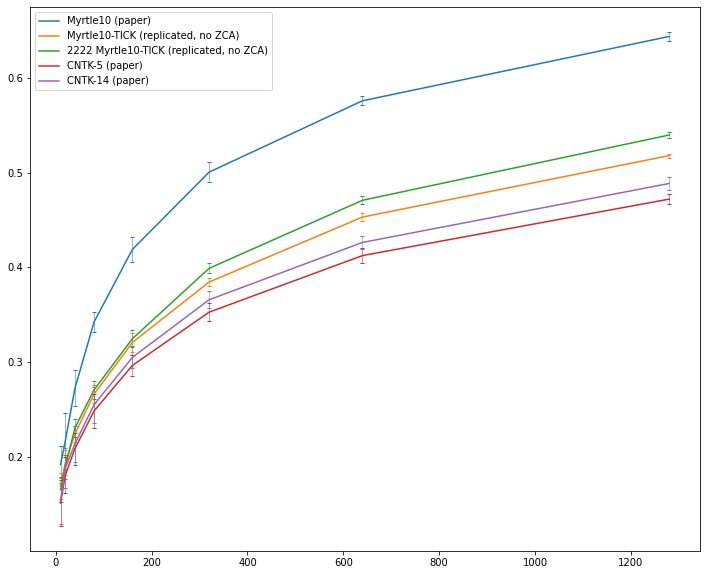

In [637]:
df = pd.DataFrame(index=baseline_X)

def f(ax, mean, err, name):
    df[name] = [f"{m:.2f}±{e:.2f}" for m, e in zip(mean, err)]
    color = ax.errorbar(baseline_X, mean, yerr=err, elinewidth=0.5,
                        capsize=2., linestyle='').lines[0].get_color()
    ax.plot(baseline_X, mean, color=color, label=name)

_, ax = plt.subplots(1, 1, figsize=(12, 10))
f(ax, baseline_myrtle10G_Y, baseline_myrtle10G_pm, "Myrtle10 (paper)")
#f(ax, baseline_myrtle5_Y, baseline_myrtle5_pm, "Myrtle5 (paper)")
#f(ax, m10_means["mean_pool"], m10_errors["mean_pool"], "Myrtle10 (replicated, no ZCA)")
#f(ax, m10_relu_Gaussian_means["mean_pool"], m10_relu_Gaussian_errors["mean_pool"], "Myrtle10_Gaussian (replicated, no ZCA)")
f(ax, m10_means["tick"], m10_errors["tick"], "Myrtle10-TICK (replicated, no ZCA)")
#f(ax, m10_means["dense"], m10_errors["dense"], "Myrtle10-Dense (replicated, no ZCA)")
f(ax, m10_means2["tick"], m10_errors2["tick"], "2222 Myrtle10-TICK (replicated, no ZCA)")
#f(ax, m10_relu_means["mean_pool"], m10_relu_errors["mean_pool"], "Myrtle10-ReLU (replicated, no ZCA)")
#f(ax, m10_relu_means["tick"], m10_relu_errors["tick"], "Myrtle10-ReLU-TICK (replicated, no ZCA)")
#f(ax, m10_relu_means["dense"], m10_relu_errors["dense"], "Myrtle10-ReLU-Dense (replicated, no ZCA)")
f(ax, cntk5, cntk5_error, "CNTK-5 (paper)")
f(ax, cntk14, cntk14_error, "CNTK-14 (paper)")

ax.legend()

In [638]:
m10_means2["tick"]

10      0.165068
20      0.189216
40      0.230142
80      0.270521
160     0.324558
320     0.398932
640     0.470847
1280    0.539863
Name: 10, dtype: float64

In [422]:
df_nooptim = df

In [592]:
sweep_paths = [
    "robbins:/scratch/ag919/logs/predict_cv_acc/19",
    "robbins:/scratch/ag919/logs/predict_cv_acc/20",
    "robbins:/scratch/ag919/logs/predict_cv_acc/21",
    "robbins:/scratch/ag919/logs/predict_cv_acc/22",
    "robbins:/scratch/ag919/logs/predict_cv_acc/23",
    "banach:/scratch/ag919/logs/predict_cv_acc/12",
    "banach:/scratch/ag919/logs/predict_cv_acc/13",
    "banach:/scratch/ag919/logs/predict_cv_acc/14",
    "banach:/scratch/ag919/logs/predict_cv_acc/15",
]

relu_sweep_paths = [
    "robbins:/scratch/ag919/logs/predict_cv_acc/24",
    "robbins:/scratch/ag919/logs/predict_cv_acc/25",
    "robbins:/scratch/ag919/logs/predict_cv_acc/26",
    #"robbins:/scratch/ag919/logs/predict_cv_acc/27",
    #"robbins:/scratch/ag919/logs/predict_cv_acc/28",
    "banach:/scratch/ag919/logs/predict_cv_acc/16",
    "banach:/scratch/ag919/logs/predict_cv_acc/17",
    "banach:/scratch/ag919/logs/predict_cv_acc/18",
    "banach:/scratch/ag919/logs/predict_cv_acc/19",
]

sweep_4cv_paths = [
    "banach:/scratch/ag919/logs/predict_cv_acc/27",
    "banach:/scratch/ag919/logs/predict_cv_acc/28",
    "banach:/scratch/ag919/logs/predict_cv_acc/29",
    "banach:/scratch/ag919/logs/predict_cv_acc/30",
]

sweep_myrtle5_loo_paths = [
    "robbins:/scratch/ag919/logs/predict_cv_acc/35",
    "thom:/scratch/ag919/logs/predict_cv_acc/20",
    "banach:/scratch/ag919/logs/predict_cv_acc/24",
    "gauss:/scratch/ag919/logs/predict_cv_acc/9",
    "fields:/scratch/ag919/logs/predict_cv_acc/10",
    "euler:/scratch/ag919/logs/predict_cv_acc/10",
]

sweep_myrtle5_4cv_paths = [
    "robbins:/scratch/ag919/logs/predict_cv_acc/37",
    "thom:/scratch/ag919/logs/predict_cv_acc/24",
    "banach:/scratch/ag919/logs/predict_cv_acc/26",
    "gauss:/scratch/ag919/logs/predict_cv_acc/11",
    "fields:/scratch/ag919/logs/predict_cv_acc/11",
    "euler:/scratch/ag919/logs/predict_cv_acc/11",

]

sweep_preresnet32_loo_paths = [
    "thom:/scratch/ag919/logs/predict_cv_acc/22",
]

sweep_preresnet32_4cv_paths = [
    "thom:/scratch/ag919/logs/predict_cv_acc/24",
]



myrtlebastard_sweep_paths = [
   "robbins:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_-1",
   "robbins:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_-1",
   "robbins:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_-1",
   "thom:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_-1",
   "thom:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_-1",
   "thom:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_-1",
   "euler:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_-1",
   "euler:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_-1",
   "euler:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_-1",
]

myrtlebastard_4cv_sweep_paths = [
   "robbins:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_4",
   "robbins:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4",
   "robbins:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4",
   "thom:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_4",
   "thom:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4",
   "thom:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4",
   "euler:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_4",
   "euler:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4",
   "euler:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4",
]

cntk14_sweep_paths = [
   "huygens:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_-1",
   #"huygens:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_-1",
   #"huygens:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_-1",
   "fields:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_-1",
   "fields:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_-1",
   "fields:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_-1",
   "gauss:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_-1",
   "gauss:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_-1",
   "gauss:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_-1",
]

cntk14_4cv_sweep_paths = [
   "huygens:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_4",
   #"huygens:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4",
   #"huygens:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4",
   "fields:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4",
   "fields:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4",
   "fields:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_4",
   "gauss:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4",
   "gauss:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4",
   "gauss:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_4",
]

cntk14_moredata_4cv = [
    "fields:/scratch/ag919/logs/kernel_plus_learn/12/n_splits_4",
    "gauss:/scratch/ag919/logs/kernel_plus_learn/6/n_splits_4",
    "banach:/scratch/ag919/logs/kernel_plus_learn/8/n_splits_4",
]

cntk14_moredata = [
    "fields:/scratch/ag919/logs/kernel_plus_learn/12/n_splits_-1",
    "gauss:/scratch/ag919/logs/kernel_plus_learn/6/n_splits_-1",
    "banach:/scratch/ag919/logs/kernel_plus_learn/8/n_splits_-1",
]

cntk14_moredata2 = [
    "fields:/scratch/ag919/logs/kernel_plus_learn/13/n_splits_-1",
    "gauss:/scratch/ag919/logs/kernel_plus_learn/7/n_splits_-1",
    "banach:/scratch/ag919/logs/kernel_plus_learn/9/n_splits_-1",
]

cntk14_moredata2_4cv = [
    "fields:/scratch/ag919/logs/kernel_plus_learn/13/n_splits_4",
    "gauss:/scratch/ag919/logs/kernel_plus_learn/7/n_splits_4",
    "banach:/scratch/ag919/logs/kernel_plus_learn/9/n_splits_4",
]


In [601]:
def build_sweep(paths):    
    def f(df):
        index = np.copy(df.index)
        columns = np.copy(df.columns)
        return pd.DataFrame(columns=columns, index=index,
                            data=np.zeros((len(index), len(columns))))
    mean = None
    var = None
    N = 0

    for p in paths:
        loo_acc_df = ExperimentResults(p, "").read_pickle("grid_acc.pkl.gz")
        if not loo_acc_df.dropna().equals(loo_acc_df):
            print(f"Skipping {p} because it is incomplete")
            continue
        loo_acc_df = loo_acc_df.applymap(lambda x: np.max(x[1]))
        
        if mean is None or var is None:
            mean = f(loo_acc_df)
            var = f(loo_acc_df)
        
        mean += loo_acc_df
        var += loo_acc_df**2
        N += 1
    return mean, var, N

def plottable_sweep(mean, var, N):
    mean = mean/N
    if N == 1:
        N_1 = 1
    else:
        N_1 = (N-1)
    var = (var/N - mean**2) * (N/N_1)  # Unbiased variance
    error = 2*(var/N)**.5
    return mean, error

In [593]:
fullticks = [
    "gauss:/scratch/ag919/logs/kernel_plus_learn/5/n_splits_4",
    "fields:/scratch/ag919/logs/kernel_plus_learn/5/n_splits_4",
    "banach:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4",
    "euler:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_4",
    "thom:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_4",
    ]



_mean_sweep, _var_sweep, _N_sweep = build_sweep(cntk14_moredata2)
mean_sweep, error_sweep = plottable_sweep(_mean_sweep, _var_sweep, _N_sweep)

idx = [-3, *np.linspace(-1.5, 4.5, 100), 6.]
mean_sweep.index = idx
error_sweep.index = idx

plot_sweep_df(mean_sweep, error_sweep)

ValueError: Length mismatch: Expected axis has 27 elements, new values have 102 elements

accessing thom:/scratch/ag919/logs/kernel_plus_learn/12/n_splits_-1
accessing thom:/scratch/ag919/logs/kernel_plus_learn/13/n_splits_-1
accessing robbins:/scratch/ag919/logs/predict_cv_acc/19
accessing robbins:/scratch/ag919/logs/predict_cv_acc/20
accessing robbins:/scratch/ag919/logs/predict_cv_acc/21
accessing robbins:/scratch/ag919/logs/predict_cv_acc/22
accessing robbins:/scratch/ag919/logs/predict_cv_acc/23
accessing banach:/scratch/ag919/logs/predict_cv_acc/12
accessing banach:/scratch/ag919/logs/predict_cv_acc/13
accessing banach:/scratch/ag919/logs/predict_cv_acc/14
accessing banach:/scratch/ag919/logs/predict_cv_acc/15


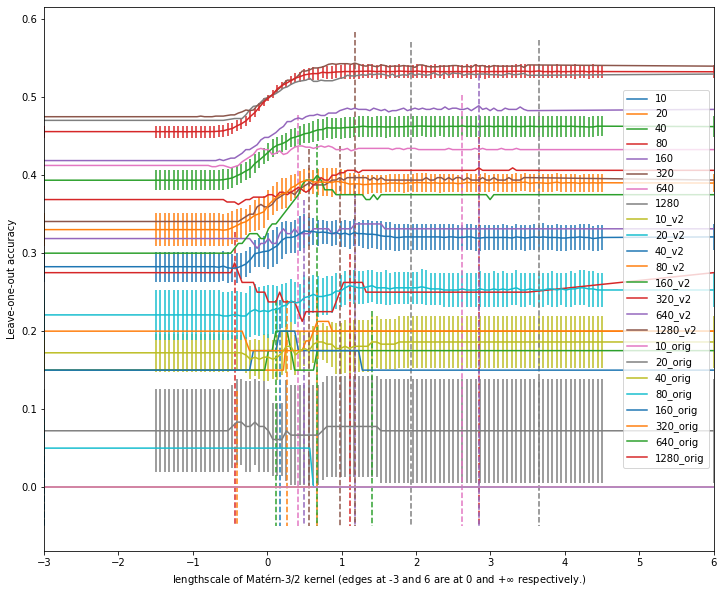

In [636]:

_mean_sweep, _var_sweep, _N_sweep = build_sweep(["thom:/scratch/ag919/logs/kernel_plus_learn/12/n_splits_-1"])
mean_sweep, error_sweep = plottable_sweep(_mean_sweep, _var_sweep, _N_sweep)

idx = [-3, *np.linspace(-1.5, 3.5, 100), 6.]
mean_sweep.index = idx
error_sweep.index = idx


_mean_sweep, _var_sweep, _N_sweep = build_sweep(["thom:/scratch/ag919/logs/kernel_plus_learn/13/n_splits_-1"])
mean_sweep2, error_sweep2 = plottable_sweep(_mean_sweep, _var_sweep, _N_sweep)

idx = [-3, *np.linspace(-1.5, 3.5, 100), 6.]
mean_sweep2.index = idx
error_sweep2.index = idx
mean_sweep2.columns = [f"{col}_v2" for col in mean_sweep2.columns]
error_sweep2.columns = [f"{col}_v2" for col in error_sweep2.columns]

_mean_sweep, _var_sweep, _N_sweep = build_sweep(sweep_paths)
mean_sweep3, error_sweep3 = plottable_sweep(_mean_sweep, _var_sweep, _N_sweep)

idx = [-3, *np.linspace(-1.5, 4.5, 100), 6.]
mean_sweep3.index = idx
error_sweep3.index = idx
mean_sweep3.columns = [f"{col}_orig" for col in mean_sweep3.columns]
error_sweep3.columns = [f"{col}_orig" for col in error_sweep3.columns]

mean_sweep = pd.concat((mean_sweep, mean_sweep2), axis=1)
error_sweep = pd.concat((error_sweep, error_sweep2), axis=1)

_, ax = plt.subplots(1, 1, figsize=(12, 10))
plot_sweep_df(mean_sweep, error_sweep, ax=ax)
plot_sweep_df(mean_sweep3, error_sweep3, ax=ax)

In [634]:
mean_sweep

,10,20,40,80,160,320,640,1280,10_v2,20_v2,40_v2,80_v2,160_v2,320_v2,640_v2,1280_v2
-3.000000,0.0,0.15,0.150,0.275,0.31875,0.340625,0.412500,0.470313,0.0,0.05,0.15,0.2,0.300,0.36875,0.418750,0.475000
-1.500000,0.0,0.15,0.150,0.275,0.31875,0.340625,0.412500,0.470313,0.0,0.05,0.15,0.2,0.300,0.36875,0.418750,0.475000
-1.449495,0.0,0.15,0.150,0.275,0.31875,0.340625,0.412500,0.470313,0.0,0.05,0.15,0.2,0.300,0.36875,0.418750,0.475000
-1.398990,0.0,0.15,0.150,0.275,0.31875,0.340625,0.412500,0.470313,0.0,0.05,0.15,0.2,0.300,0.36875,0.418750,0.475000
-1.348485,0.0,0.15,0.150,0.275,0.31875,0.340625,0.412500,0.470313,0.0,0.05,0.15,0.2,0.300,0.36875,0.418750,0.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.348485,0.0,0.20,0.175,0.250,0.33125,0.393750,0.434375,0.528906,0.0,0.00,0.15,0.2,0.375,0.40625,0.484375,0.539844
3.398990,0.0,0.20,0.175,0.250,0.33125,0.393750,0.432813,0.529688,0.0,0.00,0.15,0.2,0.375,0.40625,0.487500,0.540625
3.449495,0.0,0.20,0.175,0.250,0.33125,0.396875,0.432813,0.530469,0.0,0.00,0.15,0.2,0.375,0.40625,0.484375,0.538281
3.500000,0.0,0.20,0.175,0.250,0.33125,0.396875,0.432813,0.528125,0.0,0.00,0.15,0.2,0.375,0.40625,0.482812,0.541406


In [642]:
mean_sweep

,10,20,40,80,160,320,640,1280,2560,5120
-3.00,0.0,0.050,0.2500,0.21875,0.328125,0.332813,0.375000,0.417187,0.462598,0.514990
-1.50,0.0,0.050,0.2500,0.21875,0.328125,0.332813,0.375000,0.417187,0.463086,0.514893
-1.25,0.0,0.050,0.2500,0.21875,0.328125,0.332813,0.375000,0.416992,0.462891,0.514893
-1.00,0.0,0.050,0.2500,0.21875,0.328125,0.332813,0.375000,0.416992,0.462988,0.515137
-0.75,0.0,0.050,0.2500,0.21875,0.328125,0.332813,0.375000,0.417187,0.462988,0.515186
-0.50,0.0,0.050,0.2500,0.21875,0.325000,0.332813,0.375391,0.417383,0.462988,0.516748
-0.25,0.0,0.050,0.2500,0.21875,0.325000,0.337500,0.384375,0.421680,0.470801,0.526514
0.00,0.0,0.050,0.2500,0.23125,0.334375,0.343750,0.394531,0.428516,0.489844,0.548193
0.25,0.0,0.050,0.2625,0.23750,0.331250,0.345313,0.406250,0.446094,0.513574,0.574121
0.50,0.0,0.025,0.2625,0.26250,0.343750,0.360938,0.422656,0.475586,0.539258,0.601855


accessing banach:/scratch/ag919/logs/kernel_plus_learn/16/n_splits_4/
accessing gauss:/scratch/ag919/logs/kernel_plus_learn/9/n_splits_4/
accessing fields:/scratch/ag919/logs/kernel_plus_learn/14/n_splits_4/
accessing thom:/scratch/ag919/logs/kernel_plus_learn/9/n_splits_4/


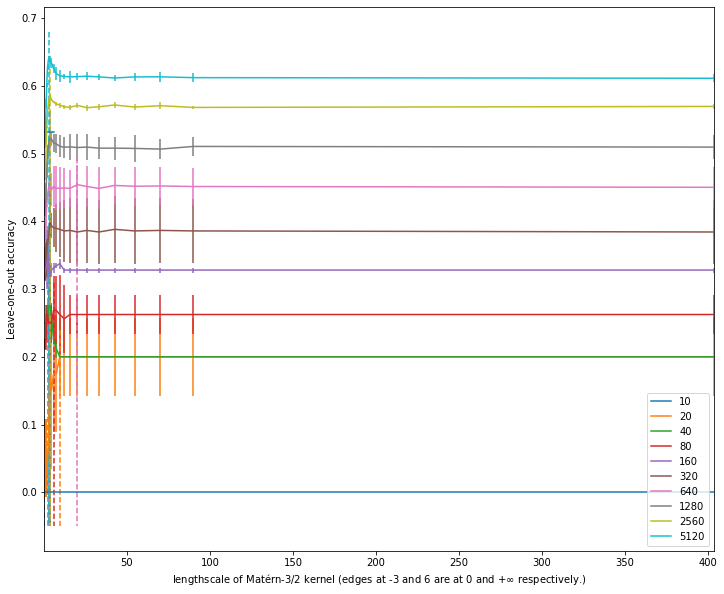

In [644]:
_mean_sweep, _var_sweep, _N_sweep = build_sweep(cntk14_moredata2_4cv)
mean_sweep, error_sweep = plottable_sweep(_mean_sweep, _var_sweep, _N_sweep)

idx = np.exp([-3, *np.linspace(-1.5, 4.5, 25), 6.])
mean_sweep.index = idx
error_sweep.index = idx

plot_sweep_df(mean_sweep, error_sweep)
plt.plot([-3, 6], [0.532639]*2)

In [671]:
" " .join(f"{s:.3f}" for s in (np.exp(np.linspace(0.5, 2.5, 10)) * 4**2 / 7**2))

'0.538 0.672 0.840 1.049 1.310 1.635 2.042 2.551 3.185 3.978'

In [660]:
np.linspace(-1.5, 3.5, 25)[10:19]

array([0.58333333, 0.79166667, 1.        , 1.20833333, 1.41666667,
       1.625     , 1.83333333, 2.04166667, 2.25      ])

accessing huygens:/scratch/ag919/logs/kernel_plus_learn/1/n_splits_4
accessing fields:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4
accessing fields:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4
accessing fields:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_4
accessing gauss:/scratch/ag919/logs/kernel_plus_learn/2/n_splits_4
accessing gauss:/scratch/ag919/logs/kernel_plus_learn/3/n_splits_4
accessing gauss:/scratch/ag919/logs/kernel_plus_learn/4/n_splits_4


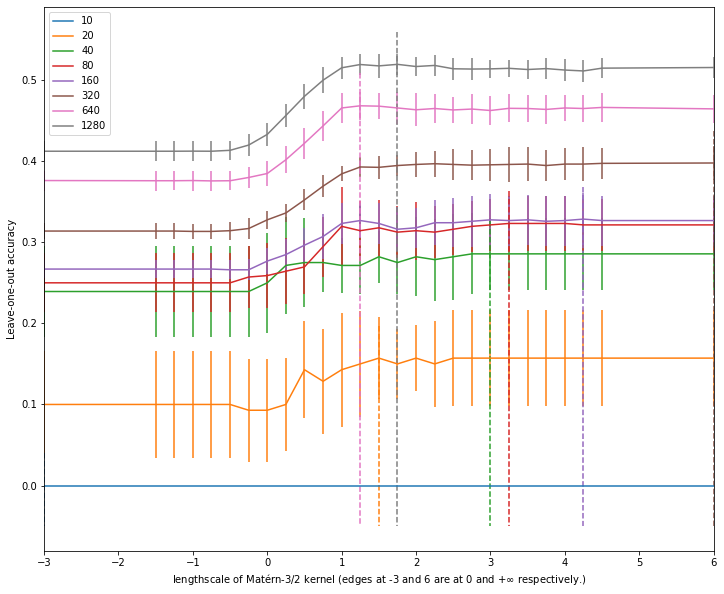

In [639]:
_mean_sweep, _var_sweep, _N_sweep = build_sweep(cntk14_4cv_sweep_paths)
mean_sweep, error_sweep = plottable_sweep(_mean_sweep, _var_sweep, _N_sweep)

idx = [-3, *np.linspace(-1.5, 4.5, 25), 6.]
mean_sweep.index = idx
error_sweep.index = idx

plot_sweep_df(mean_sweep, error_sweep)

In [530]:
_mean_sweep_myrtle5_loo, _var_sweep_myrtle5_loo, _N_sweep_myrtle5_loo, loo_acc_df = build_sweep(sweep_myrtle5_loo_paths)
_mean_sweep_preresnet32_loo, _var_sweep_preresnet32_loo, _N_sweep_preresnet32_loo, loo_acc_df = build_sweep(sweep_preresnet32_loo_paths)


In [533]:
mean_sweep, error_sweep = plottable_sweep(_mean_sweep, _var_sweep, _N_sweep)
mean_relu_sweep, error_relu_sweep = plottable_sweep(_mean_relu_sweep, _var_relu_sweep, _N_relu_sweep)
mean_relu_sweep, error_relu_sweep = plottable_sweep(_mean_relu_sweep, _var_relu_sweep, _N_relu_sweep)
mean_sweep_4cv, error_sweep_4cv = plottable_sweep(_mean_sweep_4cv, _var_sweep_4cv, _N_sweep_4cv)
mean_sweep_myrtle5_loo, error_sweep_myrtle5_loo = plottable_sweep(_mean_sweep_myrtle5_loo, _var_sweep_myrtle5_loo, _N_sweep_myrtle5_loo)
mean_sweep_preresnet32_loo, error_sweep_preresnet32_loo = plottable_sweep(_mean_sweep_preresnet32_loo, _var_sweep_preresnet32_loo, _N_sweep_preresnet32_loo)


In [534]:
idx = [-3, *np.linspace(-1.5, 4.5, 100), 6.]
mean_sweep.index = idx
error_sweep.index = idx

mean_relu_sweep.index = idx
error_relu_sweep.index = idx

mean_sweep_4cv.index = idx
error_sweep_4cv.index = idx

mean_sweep_myrtle5_loo.index = idx
error_sweep_myrtle5_loo.index = idx
mean_sweep_preresnet32_loo.index = idx
error_sweep_preresnet32_loo.index = idx   

In [635]:
def plot_sweep_df(df, err, ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(12, 10))
    df.plot(ax=ax, yerr=err)

    for i, (col, idx) in enumerate((df).idxmax().items()):
        y = df.loc[idx, col]
        ax.plot([idx, idx],  [y+0.04, -0.05], color=f"C{i}", ls='--')
    ax.set_ylabel("Leave-one-out accuracy")
    ax.set_xlabel("lengthscale of Matérn-3/2 kernel (edges at -3 and 6 are at 0 and $+\infty$ respectively.)")

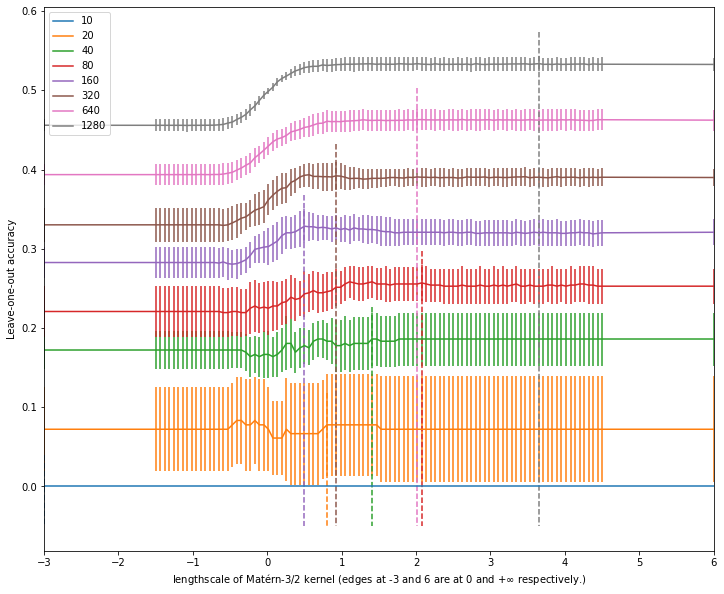

In [503]:
plot_sweep_df(mean_sweep, error_sweep)

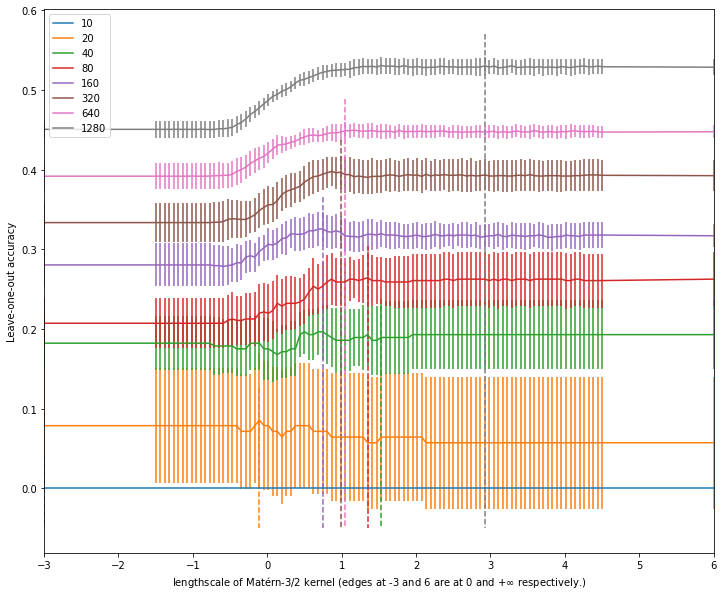

In [505]:
plot_sweep_df(mean_relu_sweep, error_relu_sweep)

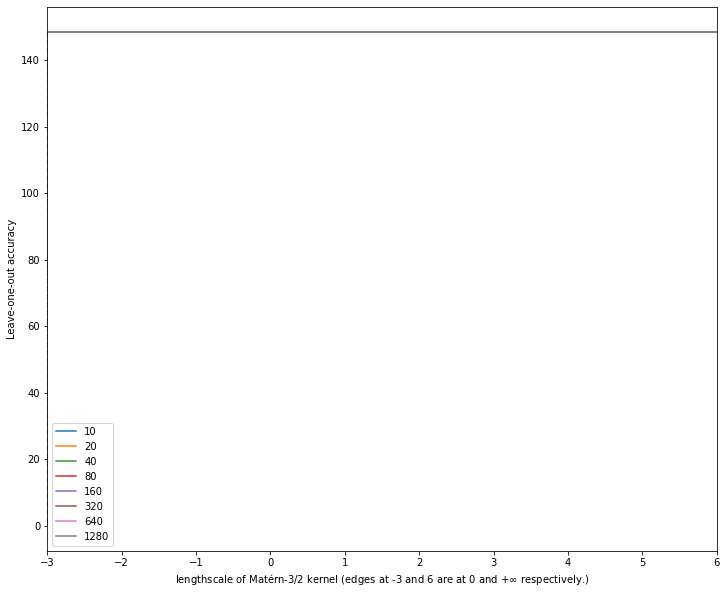

In [506]:
plot_sweep_df(mean_sweep_4cv, error_sweep_4cv)

In [521]:
loo_acc_df.loc[0, 10][1]

array([[2.31952283e-16, 2.41669893e-16, 2.51794620e-16, ...,
        1.36717659e+02, 1.42445427e+02, 1.48413159e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

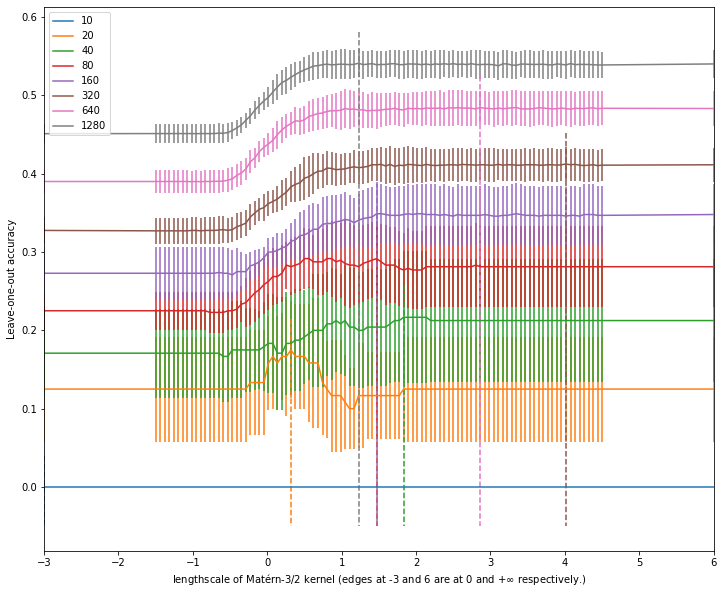

In [537]:
plot_sweep_df(mean_sweep_myrtle5_loo, error_sweep_myrtle5_loo)

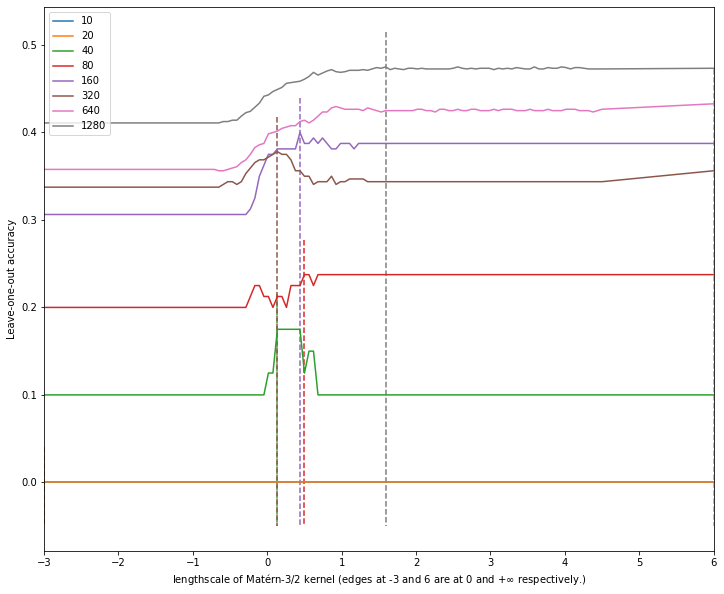

In [569]:
plot_sweep_df(mean_sweep_preresnet32_loo, error_sweep_preresnet32_loo)

In [507]:
plot_sweep_df(mean_sweep_myrtle5_loo, error_sweep_myrtle5_loo)

,10,20,40,80,160,320,640,1280
-3.000000,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
-1.500000,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
-1.439394,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
-1.378788,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
-1.318182,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
...,...,...,...,...,...,...,...,...
4.318182,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
4.378788,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
4.439394,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
4.500000,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159


In [ ]:


baseline_X = [2**i * 10 for i in range(8)]
baseline_myrtle5_Y = np.array([17.22, 22.16, 26.74, 32.56, 38.61, 46.03, 53.45, 60.46]) / 100
baseline_myrtle5_pm = np.array([2.95, 1.69, 1.56, 1.12, 1.06, 0.82, 0.80, 0.58]) / 100
baseline_myrtle10G_Y = np.array([19.15, 21.65, 27.20, 34.22, 41.89, 50.06, 57.60, 64.40]) / 100
baseline_myrtle10G_pm = np.array([1.94, 2.97, 1.90, 1.08, 1.34, 1.06, 0.48, 0.48]) / 100

cntk5 = np.array([15.08, 18.03, 20.83, 24.82, 29.63, 35.26, 41.24, 47.21]) / 100
cntk5_error = np.array([2.43, 1.91, 1.68, 1.75, 1.13, 0.97, 0.78, 0.49]) / 100

cntk14 = np.array([15.33, 18.79, 21.34, 25.48, 30.48, 36.57, 42.63, 48.86]) / 100
cntk14_error = np.array([2.43, 2.13, 1.91, 1.91, 1.17, 0.88, 0.68, 0.68]) / 100


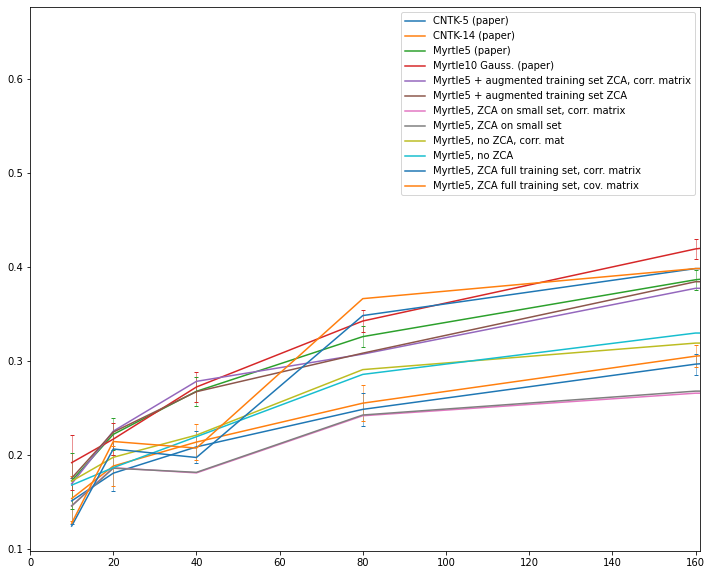

In [177]:
data = el["myrtle10_zca"].read_pickle("grid_lik_acc.pkl.gz")
df = data.applymap(lambda x: x[2].max())

lab1 = "points"
lab2 = "layer"

fig, axes = plt.subplots(1, 1, figsize=(12, 10))
ax = axes

# Baseline


color = ax.errorbar(baseline_X, cntk5, yerr=cntk5_error, elinewidth=0.5,
                    capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, cntk5, color=color, label="CNTK-5 (paper)")

color = ax.errorbar(baseline_X, cntk14, yerr=cntk14_error, elinewidth=0.5,
            capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, cntk14, color=color, label="CNTK-14 (paper)")

df = pd.DataFrame(index=baseline_X)
df["Myrtle5 (paper)"] = baseline_myrtle5_Y

color = ax.errorbar(baseline_X, baseline_myrtle5_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, baseline_myrtle5_Y, color=color, label="Myrtle5 (paper)")
color = ax.errorbar(baseline_X, baseline_myrtle10G_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, baseline_myrtle10G_Y, color=color, label="Myrtle10 Gauss. (paper)")


def f(key, name=None):
    if name is None:
        name = key
    series = el[key].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
    df[name] = series
    ax.plot(series.index, series.values, label=name)
    
f("myrtle5_gaussian_zca_shankar_v2", "Myrtle5 + augmented training set ZCA, corr. matrix")
f("myrtle5_gaussian_zca_shankar_cov", "Myrtle5 + augmented training set ZCA")
f("myrtle5_zca_corr", "Myrtle5, ZCA on small set, corr. matrix")
f("myrtle5_zca_cov", "Myrtle5, ZCA on small set")
f("myrtle5_corr", "Myrtle5, no ZCA, corr. mat")
f("myrtle5_cov", "Myrtle5, no ZCA")
f("myrtle5_zca_wrong_corr", "Myrtle5, ZCA full training set, corr. matrix")
f("myrtle5_zca_wrong_cov", "Myrtle5, ZCA full training set, cov. matrix")

ax.set_xlim((0, 161))
ax.legend()


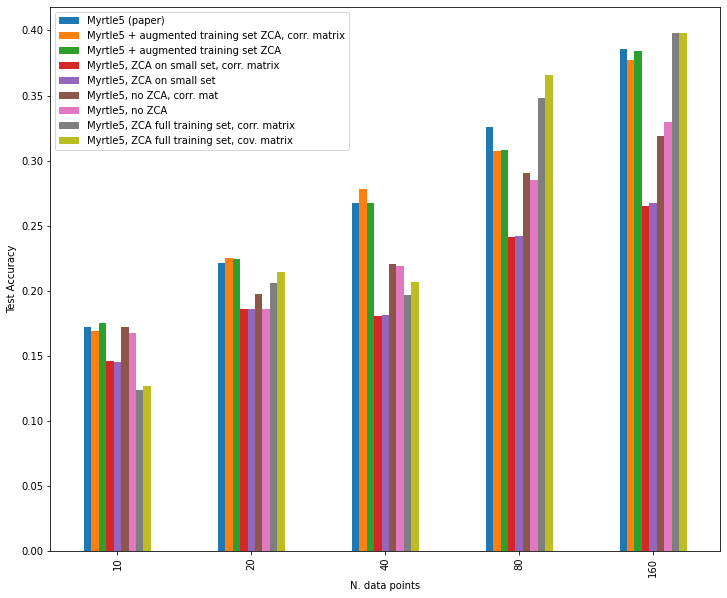

In [176]:
_, ax = plt.subplots(1, 1, figsize=(12, 10))
df.loc[:160].plot(kind='bar', ax=ax)
ax.set_xlabel("N. data points")
ax.set_ylabel("Test Accuracy")

plt.savefig("/tmp/index.png")

In [155]:
a.lines[0].get_color()

'C1'

(0.12, 0.45)

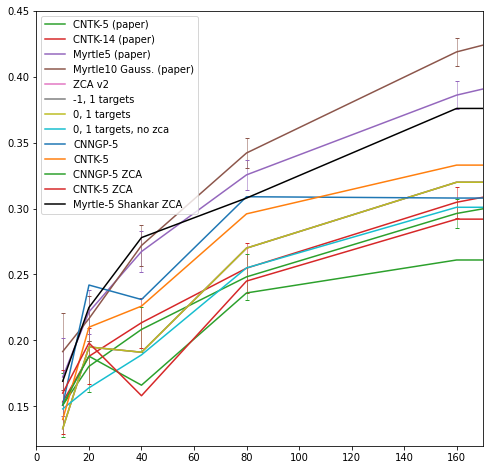

In [130]:
data = el["myrtle10_zca"].read_pickle("grid_lik_acc.pkl.gz")
df = data.applymap(lambda x: x[2].max())

lab1 = "points"
lab2 = "layer"

fig, axes = plt.subplots(1, 1, figsize=(8, 8))
ax = axes

# Baseline


ax.errorbar(baseline_X, cntk5, yerr=cntk5_error, elinewidth=0.5,
            capsize=2., linestyle='', color="C2")
ax.plot(baseline_X, cntk5, color="C2", label="CNTK-5 (paper)")

ax.errorbar(baseline_X, cntk14, yerr=cntk14_error, elinewidth=0.5,
            capsize=2., linestyle='', color="C3")
ax.plot(baseline_X, cntk14, color="C3", label="CNTK-14 (paper)")

ax.errorbar(baseline_X, baseline_myrtle5_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='', color="C4")
ax.plot(baseline_X, baseline_myrtle5_Y, color="C4", label="Myrtle5 (paper)")
ax.errorbar(baseline_X, baseline_myrtle10G_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='', color="C5")
ax.plot(baseline_X, baseline_myrtle10G_Y, color="C5", label="Myrtle10 Gauss. (paper)")

series = el["myrtle10_gaussian_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C6", label="ZCA v2")

series = el["myrtle10_gaussian_zca_v3"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C7", label="-1, 1 targets")

series = el["myrtle10_gaussian_zca_v4"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C8", label="0, 1 targets")

series = el["myrtle10_gaussian_nozca_v4"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C9", label="0, 1 targets, no zca")

series = el["cntk5_nngp"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNNGP-5")

series = el["cntk5"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNTK-5")

series = el["cntk5_nngp_zca"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNNGP-5 ZCA")

series = el["cntk5_zca"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNTK-5 ZCA")

series = el["myrtle5_gaussian_zca_shankar"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="Myrtle-5 Shankar ZCA", color="black")



#plot_df(ax, df, lab2)
#ax.set_xlabel(f"N. {lab1}")
#ax = axes[1]
#plot_df(ax, df.T, lab1)
#ax.set_xlabel(f"N. {lab2}")
ax.legend()
ax.set_xlim((0, 170))
ax.set_ylim((0.12, 0.45))

#plot_df(ax, df, lab2)
#ax.set_xlabel(f"N. {lab1}")
#ax = axes[1]
#plot_df(ax, df.T, lab1)
#ax.set_xlabel(f"N. {lab2}")
ax.legend()
ax.set_xlim((0, 170))
ax.set_ylim((0.12, 0.45))

In [132]:
df = pd.DataFrame(index=baseline_X)

df["CNTK-5 (paper)"] = cntk5
df["CNTK-14 (paper)"] = cntk14
df["Myrtle5 (paper)"] = baseline_myrtle5_Y
df["Myrtle10 Exp. (paper)"] = baseline_myrtle10G_Y



for k, v in [
    ("myrtle10_gaussian_zca_v2", "ZCA v2"),
    ("myrtle10_gaussian_zca_v3", "-1, 1 targets"),
    ("myrtle10_gaussian_zca_v4", "0, 1 targets"),
    ("myrtle10_gaussian_nozca_v4", "0, 1 targets, no ZCA"),
    
    ("cntk5", "CNTK-5"),
    ("cntk5_zca", "CNTK-5 ZCA"),
    
    ("cntk5_nngp", "CNNGP-5"),
    ("cntk5_nngp_zca", "CNNGP-5 ZCA"),
    
    ("cntk5_nngp_truetest", "CNNGP-5 True Test"),
    ("cntk5_truetest", "CNNTK-5 True Test"),
]:
    df[v] = el[k].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]

df

,CNTK-5 (paper),CNTK-14 (paper),Myrtle5 (paper),Myrtle10 Exp. (paper),ZCA v2,"-1, 1 targets","0, 1 targets","0, 1 targets, no ZCA",CNTK-5,CNTK-5 ZCA,CNNGP-5,CNNGP-5 ZCA,CNNGP-5 True Test,CNNTK-5 True Test
10,0.1508,0.1533,0.1722,0.1915,0.133,0.133,0.133,0.148,0.140,0.160,0.151,0.151,0.1542,0.1586
20,0.1803,0.1879,0.2216,0.2165,0.195,0.195,0.195,0.164,0.210,0.198,0.242,0.188,0.2162,0.1887
40,0.2083,0.2134,0.2674,0.2720,0.191,0.191,0.191,0.189,0.226,0.158,0.231,0.166,0.2302,0.2163
80,0.2482,0.2548,0.3256,0.3422,0.270,0.270,0.270,0.255,0.296,0.245,0.309,0.236,0.2901,0.2858
160,0.2963,0.3048,0.3861,0.4189,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257
320,0.3526,0.3657,0.4603,0.5006,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257
640,0.4124,0.4263,0.5345,0.5760,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257
1280,0.4721,0.4886,0.6046,0.6440,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257


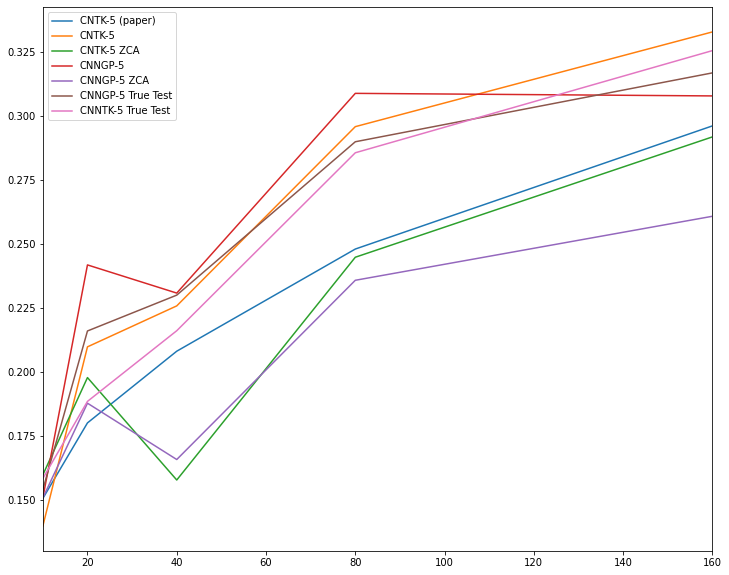

In [133]:
_, ax = plt.subplots(1, 1, figsize=(12, 10))
df.loc[:160, ["CNTK-5 (paper)", "CNTK-5", "CNTK-5 ZCA", "CNNGP-5",
              "CNNGP-5 ZCA", "CNNGP-5 True Test", "CNNTK-5 True Test"]].plot(ax=ax)

10      0.133
20      0.195
40      0.191
80      0.270
160     0.320
320     0.320
640     0.320
1280    0.320
Name: 0, dtype: float64

In [58]:

el["myrtle10_gaussian_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0])

,10,20,40,80,160,320,640,1280
0,0.133,0.195,0.191,0.27,0.32,0.32,0.32,0.32


In [54]:
el["myrtle10_cv_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[0][0])

,10,20,40,80,160,320,640,1280
0,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
1,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
2,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
3,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
4,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
5,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
6,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
7,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
8,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
9,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159


In [55]:
el["myrtle10_cv_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0])

,10,20,40,80,160,320,640,1280
0,0.1003,0.1470,0.0969,0.1110,0.1000,0.1000,0.1008,0.1179
1,0.1220,0.1397,0.1796,0.2201,0.2263,0.2748,0.3000,0.3071
2,0.1195,0.1286,0.1310,0.1408,0.1581,0.1718,0.2039,0.2362
3,0.1000,0.1313,0.1000,0.1205,0.1000,0.1000,0.1000,0.1097
4,0.1190,0.1336,0.1800,0.2156,0.2256,0.2657,0.2953,0.3024
5,0.1182,0.1438,0.1404,0.1586,0.1797,0.2018,0.2340,0.2500
6,0.1000,0.1022,0.1000,0.1016,0.1000,0.1000,0.1002,0.1083
7,0.1162,0.1320,0.1794,0.2037,0.2184,0.2602,0.2895,0.2989
8,0.1158,0.1496,0.1436,0.1693,0.1902,0.2123,0.2307,0.2568
9,0.1000,0.1000,0.1000,0.1051,0.1233,0.1224,0.1413,0.1092


In [51]:
el["myrtle10_gaussian_zca"].read_pickle("grid_lik_acc.pkl.gz").dropna().applymap(lambda x: x[0][x[2].argmax()])

,10,20,40,80,160,320,640,1280
44,0.000114,0.00059,0.001138,9.779208e-07,0.000011,0.000038,0.000002,2.319523e-16


In [52]:
el["myrtle10_gaussian_zca"].read_pickle("grid_lik_acc.pkl.gz").dropna().applymap(lambda x: x[2].max())

,10,20,40,80,160,320,640,1280
43,0.1528,0.1580,0.1676,0.2123,0.2422,0.2744,0.3028,0.3597
44,0.1529,0.1581,0.1674,0.2126,0.2418,0.2746,0.3028,0.3594


In [105]:
df = pd.DataFrame(columns=["CNTK", "Helo"], index=[10, 20, 40])

In [109]:
df.values[...] = np.random.randn(*df.values.shape)

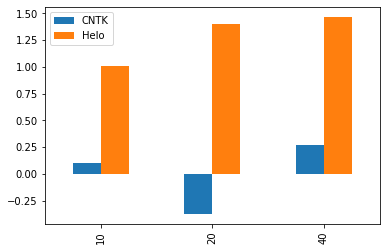

In [115]:
df.plot(kind='bar')

In [598]:
ExperimentResults(cntk14_moredata2[1], "").read_pickle("grid_acc.pkl.gz")

,5120
0,"([2.3195228302435696e-16, 2.416698926354616e-1..."
1,"([2.3195228302435696e-16, 2.416698926354616e-1..."
2,"([2.3195228302435696e-16, 2.416698926354616e-1..."
3,"([2.3195228302435696e-16, 2.416698926354616e-1..."
4,"([2.3195228302435696e-16, 2.416698926354616e-1..."
5,"([2.3195228302435696e-16, 2.416698926354616e-1..."
6,"([2.3195228302435696e-16, 2.416698926354616e-1..."
7,"([2.3195228302435696e-16, 2.416698926354616e-1..."
8,"([2.3195228302435696e-16, 2.416698926354616e-1..."
9,"([2.3195228302435696e-16, 2.416698926354616e-1..."
